In [16]:
import os
import pandas as pd

CSV_PATH = os.path.join("dataset", "jena_climate_2009_2016.csv")

dataset = pd.read_csv(CSV_PATH)
dataset.head(5)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [17]:
dataset.dtypes


Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

In [18]:
temperature = dataset.iloc[:, 2]
temperature.head()


0   -8.02
1   -8.41
2   -8.51
3   -8.31
4   -8.27
Name: T (degC), dtype: float64

In [19]:
raw_data = dataset.iloc[:, 1:]
raw_data.head()


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


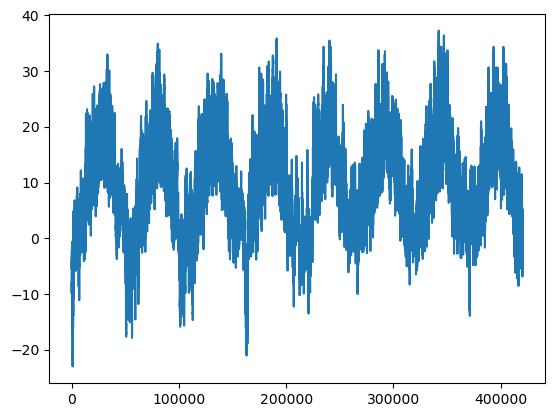

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(len(temperature)), temperature)
plt.show()


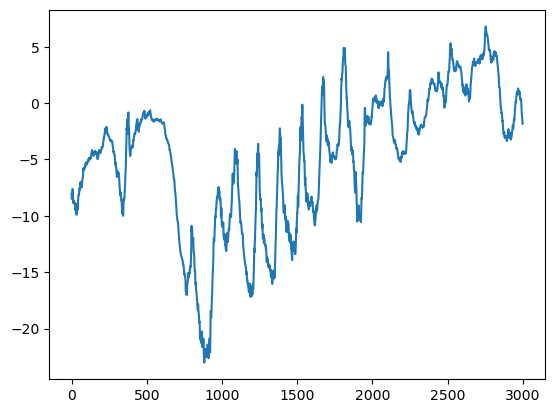

In [21]:
plt.plot(range(3000), temperature[:3000])
plt.show()


In [22]:
import tensorflow as tf

train_size = int(0.5 * len(raw_data))
validation_size = int(0.25 * len(raw_data))
print(train_size)
print(validation_size)


210225
105112


In [23]:
train_mean = raw_data[:train_size].mean(axis=0)
train_std = raw_data[:train_size].std(axis=0)
print(train_mean)
print(train_std)


p (mbar)            988.749295
T (degC)              8.825903
Tpot (K)            282.905072
Tdew (degC)           4.313319
rh (%)               75.872755
VPmax (mbar)         13.145699
VPact (mbar)          9.194142
VPdef (mbar)          3.951482
sh (g/kg)             5.810507
H2OC (mmol/mol)       9.302089
rho (g/m**3)       1218.452040
wv (m/s)              2.149775
max. wv (m/s)         3.560480
wd (deg)            176.440523
dtype: float64
p (mbar)            8.505129
T (degC)            8.771004
Tpot (K)            8.865626
Tdew (degC)         7.080129
rh (%)             16.628819
VPmax (mbar)        7.601314
VPact (mbar)        4.146907
VPdef (mbar)        4.769622
sh (g/kg)           2.632779
H2OC (mmol/mol)     4.199699
rho (g/m**3)       42.039375
wv (m/s)            1.533592
max. wv (m/s)       2.323061
wd (deg)           85.850525
dtype: float64


In [24]:
scaled_data = (raw_data - train_mean) / train_std
scaled_data.head()


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,0.913649,-1.920636,-1.974488,-1.866254,1.048015,-1.291316,-1.467152,-0.782343,-1.470122,-1.472032,2.124151,-0.730165,-0.779351,-0.281192
1,0.919528,-1.965100,-2.018478,-1.919925,1.054028,-1.304472,-1.488855,-0.784440,-1.489114,-1.493462,2.172914,-0.932305,-0.886968,-0.469893
2,0.914825,-1.976501,-2.029758,-1.924162,1.084097,-1.307103,-1.491266,-0.786537,-1.492912,-1.495843,2.183381,-1.277899,-1.261473,-0.056383
3,0.912474,-1.953699,-2.006071,-1.890265,1.102138,-1.300525,-1.476798,-0.788633,-1.477719,-1.481556,2.158404,-1.180089,-1.317434,0.251128
4,0.912474,-1.949139,-2.002687,-1.886027,1.096124,-1.299210,-1.474386,-0.788633,-1.477719,-1.479175,2.153885,-1.193130,-1.261473,0.440993


In [25]:
sampling_rate = 6
sequence_length = 5 * 24
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=scaled_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=train_size,
)
validation_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=scaled_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=train_size,
    end_index=train_size + validation_size,
)
test_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=scaled_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=train_size + validation_size,
)

print(train_dataset)
print(validation_dataset)
print(test_dataset)


<BatchDataset element_spec=(TensorSpec(shape=(None, None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [26]:
for data, label in train_dataset:
    print("train_data:", data.shape)
    print("train_label:",label.shape)
    break

for data, label in validation_dataset:
    print("validation_data:",data.shape)
    print("validation_label:",label.shape)
    break

train_data: (256, 120, 14)
train_label: (256,)
validation_data: (256, 120, 14)
validation_label: (256,)


In [27]:
import numpy as np


def evaluate_naive_method(dataset):
    total_abs_err = 0
    data_seen = 0
    for data, label in dataset:
        preds = data[:, -1, 1] * train_std[1] + train_mean[1]
        total_abs_err += np.sum(np.abs(preds - label))
        data_seen += data.shape[0]
    return total_abs_err / data_seen


print("Navie Method Validation MAE:", evaluate_naive_method(validation_dataset))


Navie Method Validation MAE: 2.441735748565519


In [28]:
def get_simple_lstm(sequence_length, column_length):
    model_in = tf.keras.Input(shape=(sequence_length, column_length))
    x = tf.keras.layers.SimpleRNN(16)(model_in)
    model_out = tf.keras.layers.Dense(1)(x)
    return tf.keras.Model(inputs=model_in, outputs=model_out)

simple_lstm = get_simple_lstm(sequence_length, len(scaled_data.columns))
simple_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [29]:
simple_lstm.compile(
    optimizer="rmsprop", loss="mse", metrics=["mae"]
)

In [30]:
simple_lstm_history = simple_lstm.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
819/819 [==============================] - 180s 218ms/step - loss: 46.7606 - mae: 5.0142 - val_loss: 13.3025 - val_mae: 2.7130
Epoch 2/10
819/819 [==============================] - 178s 217ms/step - loss: 11.3979 - mae: 2.6111 - val_loss: 9.3495 - val_mae: 2.3718
Epoch 3/10
819/819 [==============================] - 175s 214ms/step - loss: 10.4291 - mae: 2.5180 - val_loss: 9.1261 - val_mae: 2.3481
Epoch 4/10
819/819 [==============================] - 175s 214ms/step - loss: 10.2762 - mae: 2.5013 - val_loss: 9.0618 - val_mae: 2.3414
Epoch 5/10
819/819 [==============================] - 176s 215ms/step - loss: 10.1901 - mae: 2.4908 - val_loss: 8.9474 - val_mae: 2.3258
Epoch 6/10
819/819 [==============================] - 176s 214ms/step - loss: 10.1098 - mae: 2.4810 - val_loss: 9.0896 - val_mae: 2.3447
Epoch 7/10
819/819 [==============================] - 175s 213ms/step - loss: 10.0427 - mae: 2.4734 - val_loss: 8.9480 - val_mae: 2.3218
Epoch 8/10
819/819 [====================

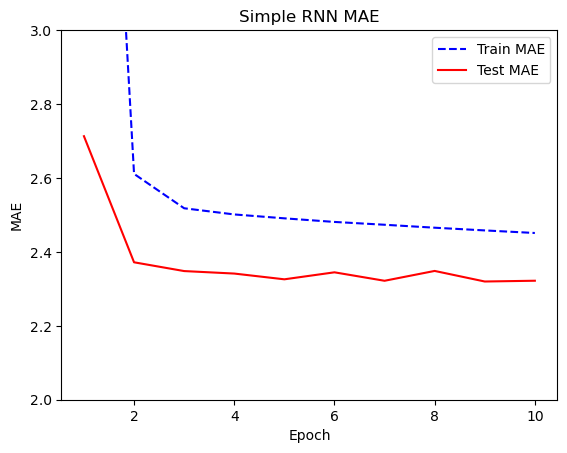

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), simple_lstm_history.history["mae"], "b--", label="Train MAE")
plt.plot(range(1, 11), simple_lstm_history.history["val_mae"], "r-", label="Test MAE")
plt.title("Simple RNN MAE")
plt.ylim(2, 3)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.show()
